# Summary

In response to growing emphasis on workplace diversity, our company undertook a comprehensive analysis to assess its current diversity landscape. The primary objectives were to identify the most effective recruiting sources for diversity, uncover potential pay inequities, and evaluate the organization's overall diversity profile concerning race, gender, and age. Data visualization played a pivotal role in this analysis. Bar plots revealed wage disparities by gender in specific departments, with women in the Software Engineering department earning more on average, albeit with a smaller sample size. Scatter plots highlighted pay rate variations in the Admin Offices and Software Engineering departments. Age diversity was depicted using distribution plots, indicating a concentration of employees in their late 30s to early 40s. Histogram showcased gender distribution across recruitment sources and departments, revealing sources like newspaper/magazine and Indeed as more favorable for recruiting women. Key findings included Diversity Job Fair emerged as a cornerstone in diversifying Dental Magic. At IT/IS, people of two or more races are paid significantly less than other workers in the same job position. Women constituting 60% of the workforce, yet earning less on average than men. Most workers aged 60+ in Production work at lower-paid positions.

# Situation

In the contemporary business landscape, there's a growing emphasis on fostering diversity and inclusion within organizations. Our company, like many others, recognizes the myriad benefits of a diverse workforce, from enhanced creativity to better financial performance. However, there have been concerns raised, both internally and from external stakeholders, about the current state of diversity within our organization. Questions have emerged about the effectiveness of our recruiting sources in promoting diversity, potential pay inequities across different departments, and the overall diversity profile of the company. Given the importance of these issues, both from an ethical standpoint and for the company's long-term success, there was a pressing need to conduct a comprehensive diversity analysis, focusing on race, gender, and age.

# Task

The main purposes of this project are:

* What are our best recruiting sources if we want to ensure a diverse organization?
* Are there areas of the company where pay is not equitable?
* What is the overall diversity profile of the organization?

We will be analyzing each matter with regard to race, gender, and age.

# Action

## Data Preparation

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
hr_data = pd.read_csv('HRDataset_v13.csv')

hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               310 non-null    object 
 1   EmpID                       310 non-null    float64
 2   MarriedID                   310 non-null    float64
 3   MaritalStatusID             310 non-null    float64
 4   GenderID                    310 non-null    float64
 5   EmpStatusID                 310 non-null    float64
 6   DeptID                      310 non-null    float64
 7   PerfScoreID                 310 non-null    float64
 8   FromDiversityJobFairID      310 non-null    float64
 9   PayRate                     310 non-null    float64
 10  Termd                       310 non-null    float64
 11  PositionID                  310 non-null    float64
 12  Position                    310 non-null    object 
 13  State                       310 non

In [3]:
hr_data.dropna(how='all', inplace=True)

In [4]:
# Select data that will be used in the analysis

diverse_data=hr_data.loc[:,['RaceDesc','Sex','DOB','DateofHire','RecruitmentSource','Department','Position','PayRate','PerformanceScore','SpecialProjectsCount']]

diverse_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 0 to 309
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RaceDesc              310 non-null    object 
 1   Sex                   310 non-null    object 
 2   DOB                   310 non-null    object 
 3   DateofHire            310 non-null    object 
 4   RecruitmentSource     310 non-null    object 
 5   Department            310 non-null    object 
 6   Position              310 non-null    object 
 7   PayRate               310 non-null    float64
 8   PerformanceScore      310 non-null    object 
 9   SpecialProjectsCount  310 non-null    float64
dtypes: float64(2), object(8)
memory usage: 26.6+ KB


In [5]:
diverse_data

,RaceDesc,Sex,DOB,DateofHire,RecruitmentSource,Department,Position,PayRate,PerformanceScore,SpecialProjectsCount
0,Black or African American,F,11/24/87,10/27/2008,Diversity Job Fair,Admin Offices,Accountant I,28.50,Fully Meets,6.0
1,Black or African American,M,04/26/84,1/6/2014,Website Banner Ads,Admin Offices,Accountant I,23.00,Fully Meets,4.0
2,White,M,09/01/86,9/29/2014,Internet Search,Admin Offices,Accountant I,29.00,Fully Meets,5.0
3,White,F,09/16/85,2/16/2015,Pay Per Click - Google,Admin Offices,Administrative Assistant,21.50,Fully Meets,4.0
4,White,F,05/19/88,5/1/2015,Website Banner Ads,Admin Offices,Administrative Assistant,16.56,Fully Meets,5.0
...,...,...,...,...,...,...,...,...,...,...
305,White,F,01/18/52,11/10/2014,Vendor Referral,IT/IS,Sr. Network Engineer,54.10,Fully Meets,8.0
306,White,M,04/23/86,11/10/2014,Employee Referral,IT/IS,Sr. Network Engineer,56.20,Fully Meets,6.0
307,Asian,M,02/09/83,6/30/2016,On-campus Recruiting,IT/IS,Sr. Network Engineer,53.80,Fully Meets,5.0
308,White,M,09/09/65,11/10/2014,Employee Referral,IT/IS,Sr. Network Engineer,53.00,Fully Meets,4.0


In [6]:
#organize the data form

diverse_data['DOB']=pd.to_datetime(diverse_data['DOB'],errors="coerce")

diverse_data.loc[diverse_data['DOB'].dt.year > 2000, 'DOB'] -= pd.DateOffset(years=100)

diverse_data['DateofHire']=pd.to_datetime(diverse_data['DateofHire'],errors="coerce")

C:\Users\lanpa\AppData\Local\Temp\ipykernel_45228\3375701607.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  diverse_data['DOB']=pd.to_datetime(diverse_data['DOB'],errors="coerce")


In [7]:
#Calculate employee age and tenure

current_date = datetime.today()

diverse_data['Age']=round((current_date - diverse_data['DOB']).dt.days/365.25,2)

diverse_data['Tenure']=round((current_date - diverse_data['DateofHire']).dt.days/365.25,2)

diverse_data.drop(['DOB','DateofHire'],axis=1)

,RaceDesc,Sex,RecruitmentSource,Department,Position,PayRate,PerformanceScore,SpecialProjectsCount,Age,Tenure
0,Black or African American,F,Diversity Job Fair,Admin Offices,Accountant I,28.50,Fully Meets,6.0,35.82,14.90
1,Black or African American,M,Website Banner Ads,Admin Offices,Accountant I,23.00,Fully Meets,4.0,39.40,9.71
2,White,M,Internet Search,Admin Offices,Accountant I,29.00,Fully Meets,5.0,37.05,8.98
3,White,F,Pay Per Click - Google,Admin Offices,Administrative Assistant,21.50,Fully Meets,4.0,38.01,8.59
4,White,F,Website Banner Ads,Admin Offices,Administrative Assistant,16.56,Fully Meets,5.0,35.34,8.39
...,...,...,...,...,...,...,...,...,...,...
305,White,F,Vendor Referral,IT/IS,Sr. Network Engineer,54.10,Fully Meets,8.0,71.67,8.86
306,White,M,Employee Referral,IT/IS,Sr. Network Engineer,56.20,Fully Meets,6.0,37.41,8.86
307,Asian,M,On-campus Recruiting,IT/IS,Sr. Network Engineer,53.80,Fully Meets,5.0,40.61,7.23
308,White,M,Employee Referral,IT/IS,Sr. Network Engineer,53.00,Fully Meets,4.0,58.03,8.86


## Racial Diversity

In [8]:
diverse_data['RaceDesc'].value_counts(normalize=True)*100

RaceDesc
White                               62.258065
Black or African American           18.387097
Asian                               10.967742
Two or more races                    5.806452
American Indian or Alaska Native     1.290323
Hispanic                             1.290323
Name: proportion, dtype: float64

* According to 2021 data by the U.S Bureau of Labor Statistics, the country's labor force is made of 77% Whites, 13% Blacks and 7% Asians (https://www.bls.gov/opub/reports/race-and-ethnicity/2021/home.htm). Taking that as a baseline, we can say that the company is diverse from a racial standpoint.

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

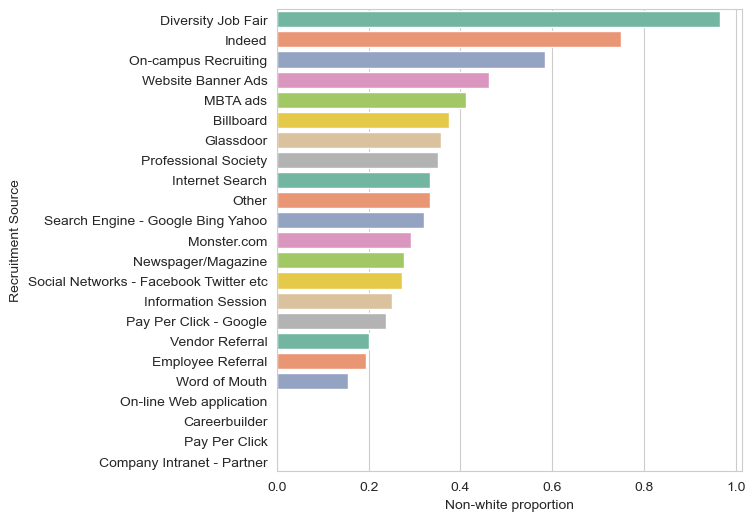

In [10]:
diverse_data['Non-white'] = (diverse_data['RaceDesc'] != 'White')

fig = plt.figure(figsize=(6, 6)), sns.set_style('whitegrid')

# Ordering for better visualization

ordered_nw = diverse_data.groupby('RecruitmentSource')['Non-white'].mean().reset_index().sort_values('Non-white', ascending=False)

ax = sns.barplot(data=ordered_nw, y='RecruitmentSource', x='Non-white', palette='Set2')

ax.set_xlabel('Non-white proportion'), ax.set_ylabel('Recruitment Source');

* Unsurprisingly, Diversity Job Fair plays a crucial role in promoting racial diversity. Indeed and On-campus Recruiting can also be lauded for bringing non-white employees more often than not.

* On the other hand, Pay Per Click, On-line Web application, Careerbuilder and Company Intranet have no contribution to racial diversity at all.

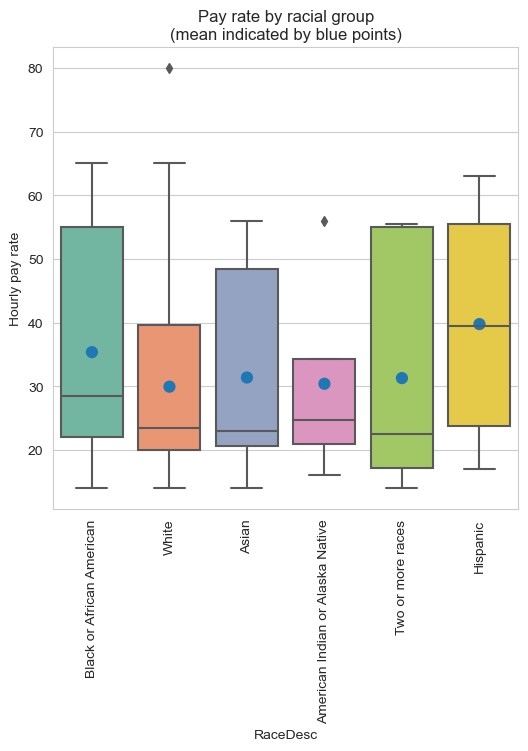

In [11]:
plt.figure(figsize=(6, 6))

ax = sns.boxplot(data=diverse_data, x='RaceDesc', y='PayRate', palette='Set2')

ax.set_xticklabels(diverse_data['RaceDesc'].unique(), rotation=90)

sns.pointplot(data=diverse_data, x='RaceDesc', y='PayRate', join=False, errorbar=None, ax=ax)

ax.set_ylabel('Hourly pay rate'); 

ax.set_title('Pay rate by racial group\n(mean indicated by blue points)');

There are a few differences in median and mean payment across races. For instance, Hispanics are placed a bit higher.

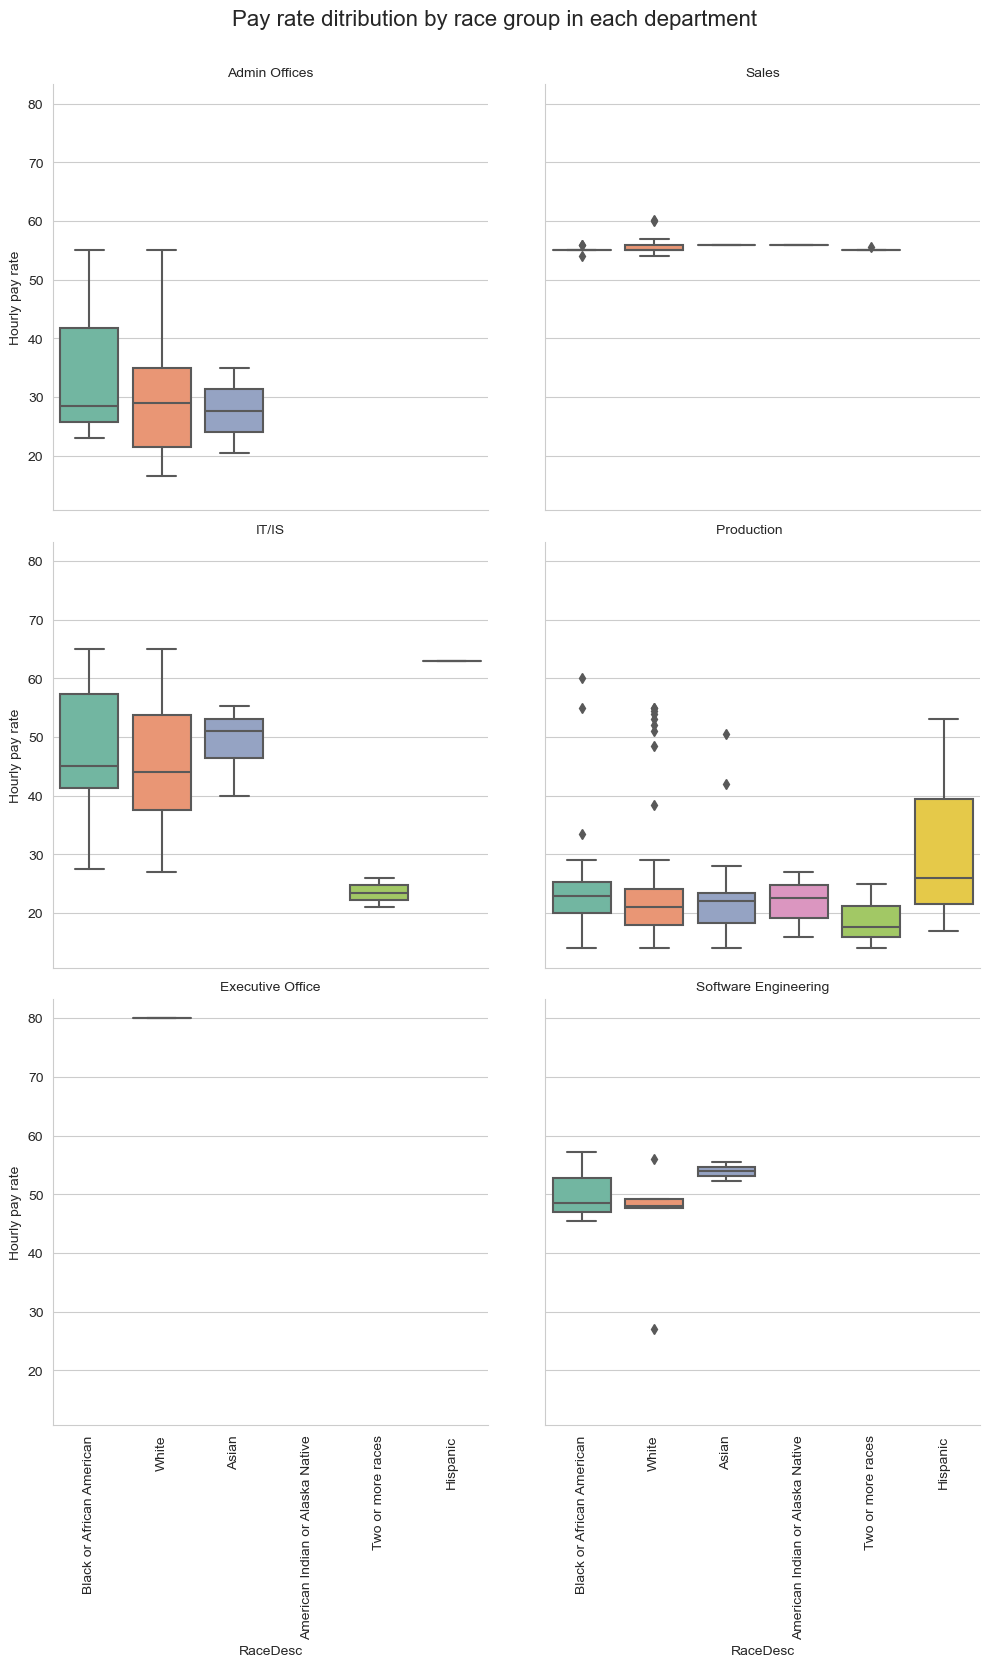

In [12]:
ax2 = sns.catplot(data=diverse_data, x='RaceDesc', col_wrap=2, y='PayRate', col='Department', kind='box', palette='Set2')

ax2.set_xticklabels(diverse_data['RaceDesc'].unique(), rotation=90)

ax2.set_ylabels('Hourly pay rate')

ax2.fig.suptitle('Pay rate ditribution by race group in each department', fontsize=16)

ax2.set_titles('{col_name}')

plt.subplots_adjust(top=0.93)

An in-depth look at each department shows that payment is generally egalitarian. The exception is IT/IS, wherein those of two or more races have a diminished pay rate.

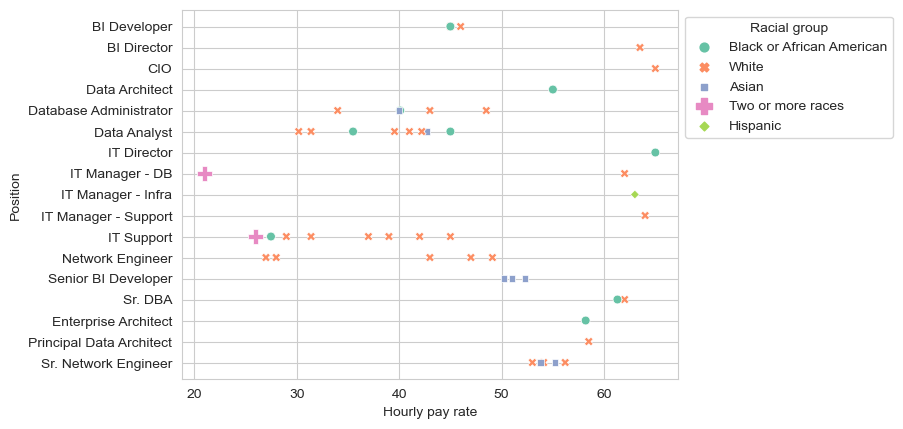

In [13]:
diverse_data['Position'] = hr_data['Position'].str.strip()

ax3 = sns.scatterplot(data=diverse_data.loc[diverse_data['Department']=='IT/IS'], x='PayRate', y='Position', hue='RaceDesc', palette='Set2', style='RaceDesc',size='RaceDesc', sizes=[40, 40, 40, 120, 40]);

legend= ax3.legend(bbox_to_anchor=(1, 1)); 

legend.set_title('Racial group')

ax3.set_xlabel('Hourly pay rate'); 

* The plot reveals that employees of two or more races group are actually being paid lower than colleagues in the same position. This could be the result of discriminatory practices. Let's investigate further to see if there are any reasonable causes for the wage gap:

In [14]:
# Filtering only rows that contain "two or more races" workers

position_rows = diverse_data['Position'].isin(['IT Support', 'IT Manager - DB'])

perf_indicators = ['RaceDesc','Position', 'PerformanceScore', 'SpecialProjectsCount','Tenure','PayRate']

it_is_lookup = diverse_data.loc[position_rows, perf_indicators].sort_values(['Position','PayRate'],ascending=[True,False]).set_index(['Position'])

it_is_lookup

,RaceDesc,PerformanceScore,SpecialProjectsCount,Tenure,PayRate
Position,,,,,
IT Manager - DB,White,Fully Meets,7.0,10.67,62.00
IT Manager - DB,Two or more races,Fully Meets,6.0,11.70,21.00
IT Support,White,Fully Meets,6.0,8.71,45.00
IT Support,White,Fully Meets,7.0,8.48,42.00
IT Support,White,Fully Meets,5.0,8.71,39.00
IT Support,White,Fully Meets,6.0,8.71,37.00
IT Support,White,Fully Meets,5.0,13.39,31.40
IT Support,White,Fully Meets,6.0,11.04,28.99
IT Support,Black or African American,Fully Meets,5.0,12.28,27.49


* The perfomance and tenure of two or more races employees are rather levelled with that of colleagues in the same position, yet their pay rates are the lower than any other. As far as the dataset goes, this points to the existence of discrimination.

## Gender Equality

In [15]:
diverse_data['Sex'].value_counts(normalize=True)*100

Sex
F     57.096774
M     42.903226
Name: proportion, dtype: float64

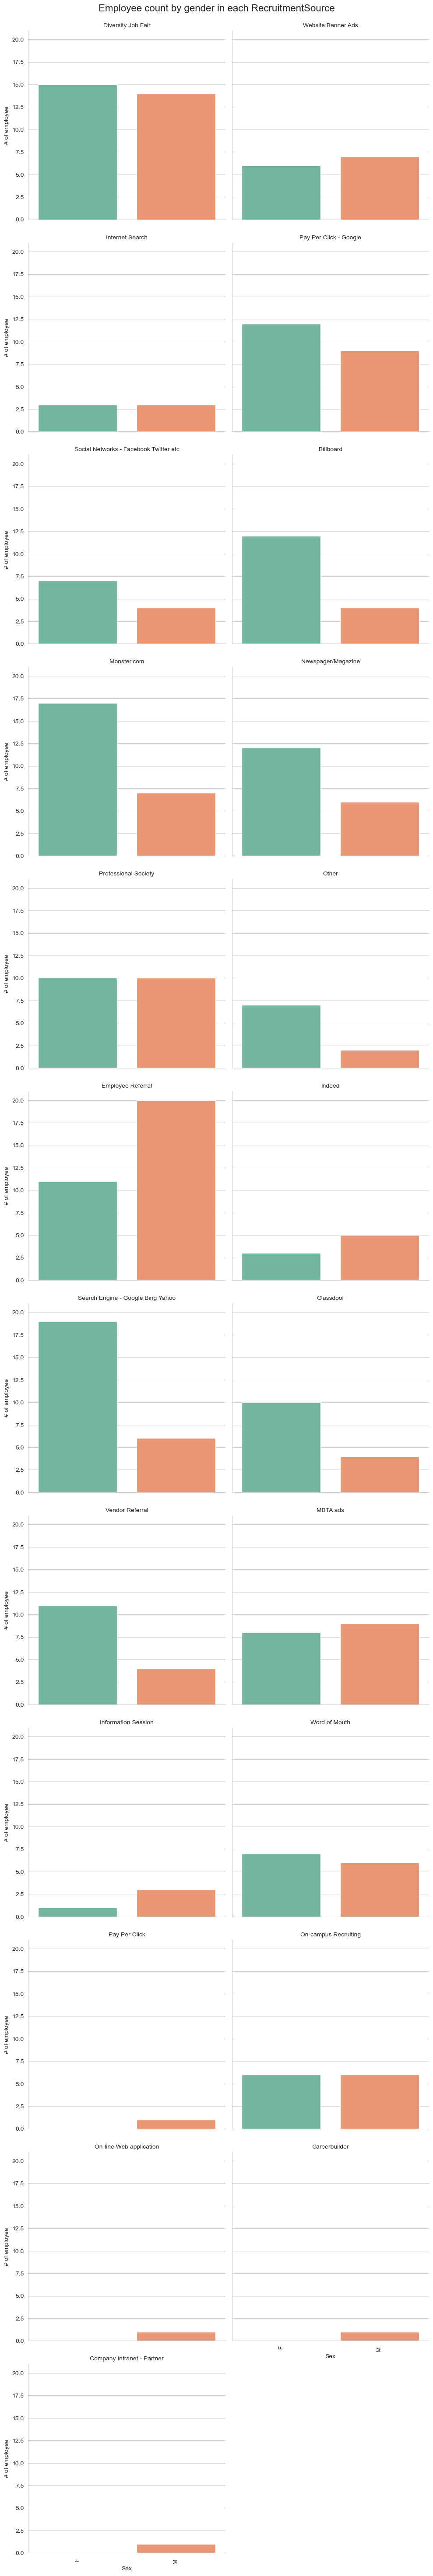

In [16]:
ax4 = sns.catplot(data=diverse_data, x='Sex', col_wrap=2, col='RecruitmentSource', kind='count', palette='Set2')

ax4.set_xticklabels(diverse_data['Sex'].unique(), rotation=90)

ax4.set_ylabels('# of employee')

ax4.fig.suptitle('Employee count by gender in each RecruitmentSource', fontsize=16)

ax4.set_titles('{col_name}')

plt.subplots_adjust(top=0.97)

* Overall, there is 60% women and 40% men in the company. Across all the recruitment source, newspaper/magazine and professional society, Indeed ,and Vendor Referral are recruiting more women. On the other side, search engine is recruiting more men.

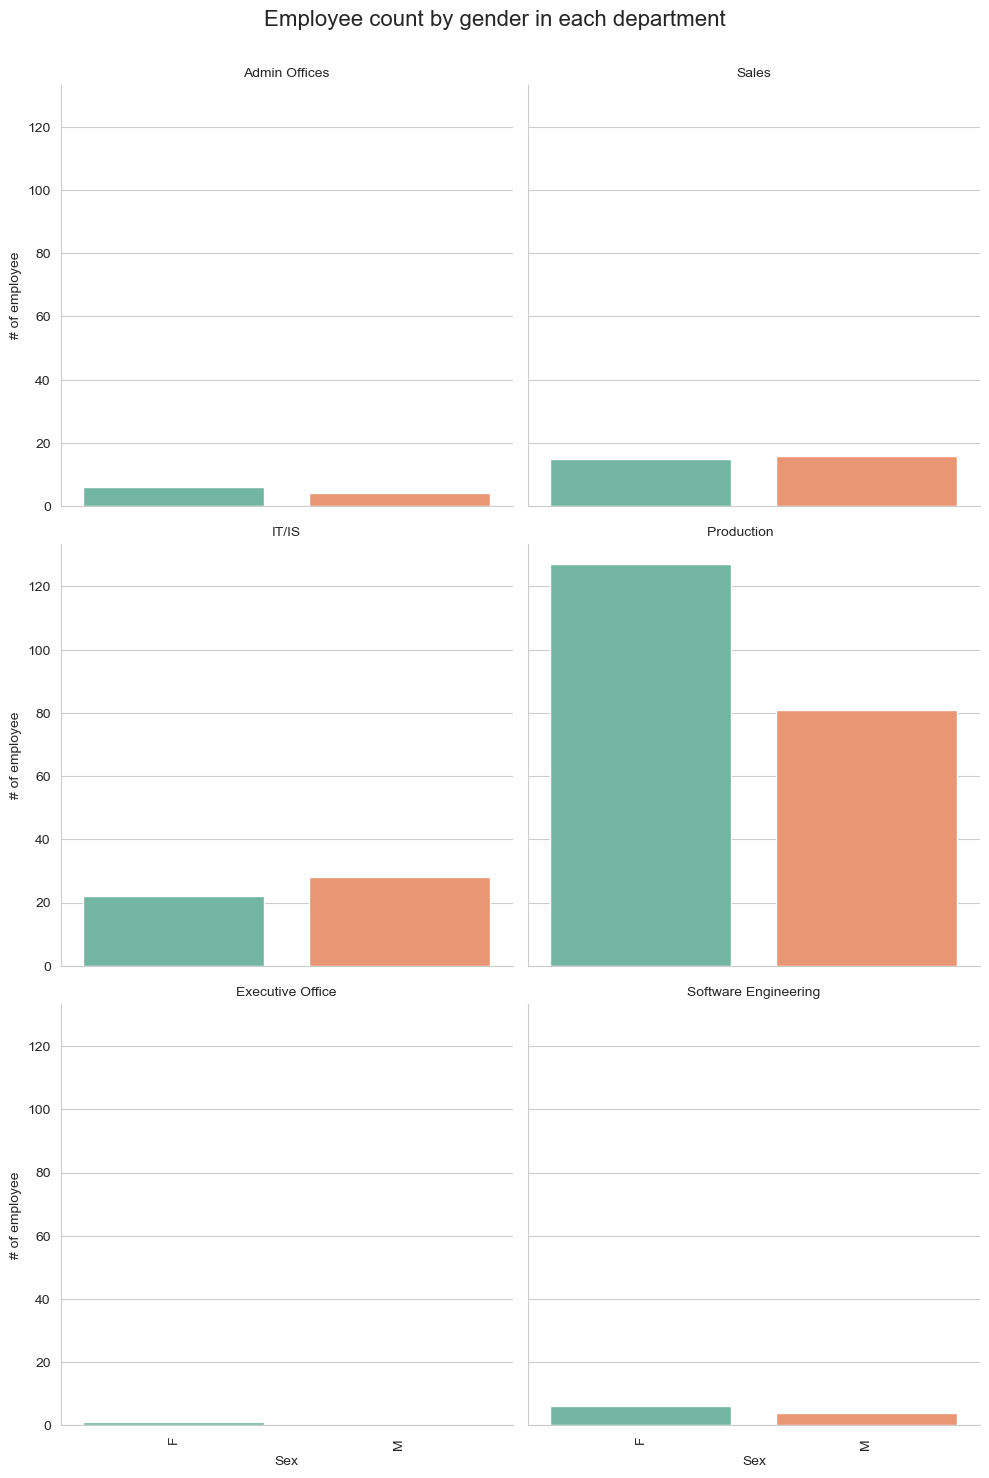

In [17]:
ax4 = sns.catplot(data=diverse_data, x='Sex', col_wrap=2, col='Department', kind='count', palette='Set2')

ax4.set_xticklabels(diverse_data['Sex'].unique(), rotation=90)

ax4.set_ylabels('# of employee')

ax4.fig.suptitle('Employee count by gender in each department', fontsize=16)

ax4.set_titles('{col_name}')

plt.subplots_adjust(top=0.93)

* We can see that the numeric difference stems from the Production department, where women outnumber men by 50%.

In [18]:
diverse_data.groupby('Sex')['PayRate'].agg(['mean','median'])

,mean,median
Sex,,
F,29.472147,24.0
M,33.697143,26.0


* Women's income is lower in general.

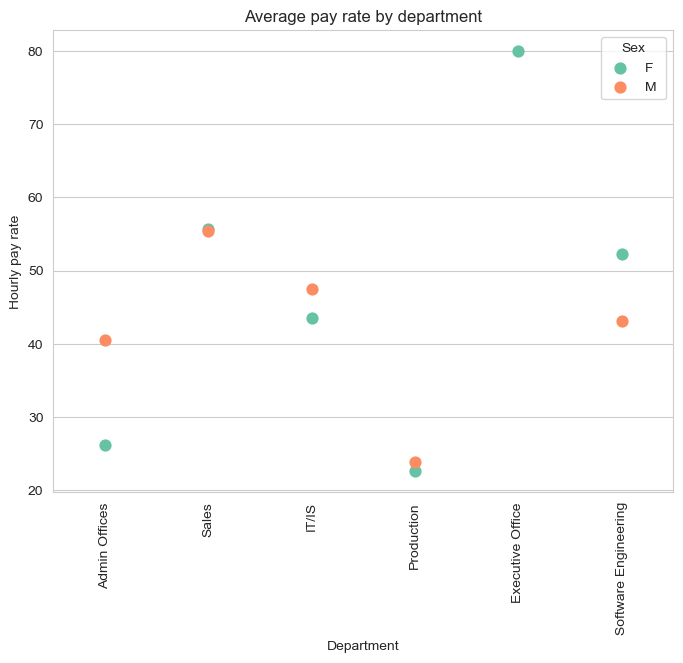

In [19]:
diverse_data['Department'] = diverse_data['Department'].str.strip()

plt.figure(figsize=(8, 6))

ax5 = sns.pointplot(data=diverse_data, x='Department', y='PayRate',hue='Sex', palette='Set2', errorbar=None, join=False)

ax5.set_xticklabels(diverse_data['Department'].unique(), rotation=90);

ax5.set_ylabel('Hourly pay rate');

ax5.set_title("Average pay rate by department");

* At the plot, we identify some divergences in average pay by gender. Women's average pay is quite higher at Software Engineering department. However, it is important to note that only a handful of employees work there, in such a way that it doesn't affect the overall statistics so much.


* On the other hand, Production plays a big part in broadening the wage gap because the Production department has the lowest pay rate;
since it contains the largest number of workers, most of them being women, this decreases female mean compensation by a lot; considering the employee amount, even though the inequality within Production itself isn't great, it ends up making a significant impact.

* We can see a substantial wage gap at Admin Offices; there, women's average income is much lower than men's.



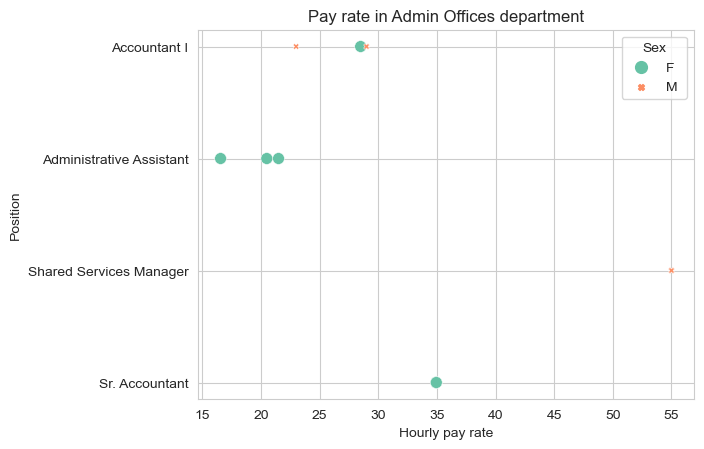

In [20]:
ax6 = sns.scatterplot(x='PayRate', y='Position', hue='Sex', style='Sex',size='Sex', data=diverse_data[diverse_data['Department'] == 'Admin Offices'], palette='Set2')

ax6.set_xlabel('Hourly pay rate'), 

ax6.set_title('Pay rate in Admin Offices department');

In [21]:
position_rows = diverse_data['Department'].isin(['Admin Offices'])

perf_indicators = ['Sex','Position', 'PerformanceScore', 'SpecialProjectsCount','Tenure','PayRate']

it_is_lookup = diverse_data.loc[position_rows, perf_indicators].sort_values(['Position','PayRate'],ascending=[True,False]).set_index('Position')

it_is_lookup

,Sex,PerformanceScore,SpecialProjectsCount,Tenure,PayRate
Position,,,,,
Accountant I,M,Fully Meets,5.0,8.98,29.00
Accountant I,F,Fully Meets,6.0,14.90,28.50
Accountant I,M,Fully Meets,4.0,9.71,23.00
Administrative Assistant,F,Fully Meets,4.0,8.59,21.50
Administrative Assistant,F,Fully Meets,4.0,11.99,20.50
Administrative Assistant,F,Fully Meets,5.0,8.39,16.56
Shared Services Manager,M,Fully Meets,0.0,7.71,55.00
Shared Services Manager,M,Fully Meets,0.0,12.58,55.00
Sr. Accountant,F,Fully Meets,2.0,14.71,34.95


* An in-depth analysis reveals that the wage disparity at Admin Offices, the largest throughout departments, comes from the presence of two men working in a high-paid position (shared services manager), contrasted with three women employed as administrative assistant.

* Among those whose title is Accountant I, the female employee's pay rate is only marginally lower than that of a male colleague. We can also see that only women work as Sr. Accountants, which shows that females aren't necessarily kept away from higher positions in this department.

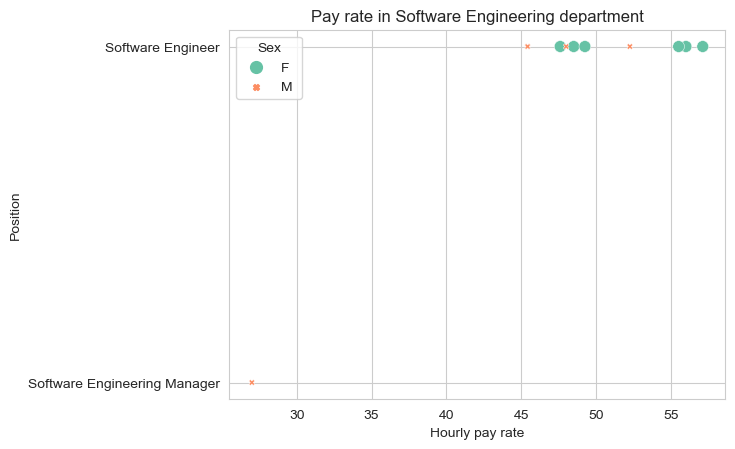

In [22]:
ax7 = sns.scatterplot(x='PayRate', y='Position', hue='Sex', style='Sex',size='Sex', data=diverse_data[diverse_data['Department'] == 'Software Engineering'], palette='Set2')

ax7.set_xlabel('Hourly pay rate'), 

ax7.set_title('Pay rate in Software Engineering department');

In [23]:
position_rows = diverse_data['Department'].isin(['Software Engineering'])

perf_indicators = ['Sex','Position', 'PerformanceScore', 'SpecialProjectsCount','Tenure','PayRate']

it_is_lookup = diverse_data.loc[position_rows, perf_indicators].sort_values(['Position','PayRate'],ascending=[True,False]).set_index('Position')

it_is_lookup

,Sex,PerformanceScore,SpecialProjectsCount,Tenure,PayRate
Position,,,,,
Software Engineer,F,Fully Meets,5.0,11.70,57.12
Software Engineer,F,Fully Meets,6.0,9.86,56.00
Software Engineer,F,Fully Meets,4.0,9.86,55.51
Software Engineer,M,Exceeds,3.0,11.87,52.25
Software Engineer,F,Fully Meets,6.0,10.87,49.25
Software Engineer,F,Needs Improvement,4.0,12.39,48.50
Software Engineer,M,Exceeds,5.0,9.21,48.00
Software Engineer,F,Fully Meets,4.0,8.86,47.60
Software Engineer,M,Fully Meets,4.0,10.59,45.42


* We now see that a male is a outlier.

* He is the manager of the department, but his pay is registered as the lowest one. It is highly unlinkely that his pay rate is lower than his subordinates'. Also, the data doesn't point to bad performance. It might be sensible to assume that this piece of information is actually incorrect, possibly due to input error.

## Age Diversity

In [24]:
diverse_data['Age'].apply(['min', 'median', 'max'])

min       31.09
median    43.02
max       72.72
Name: Age, dtype: float64

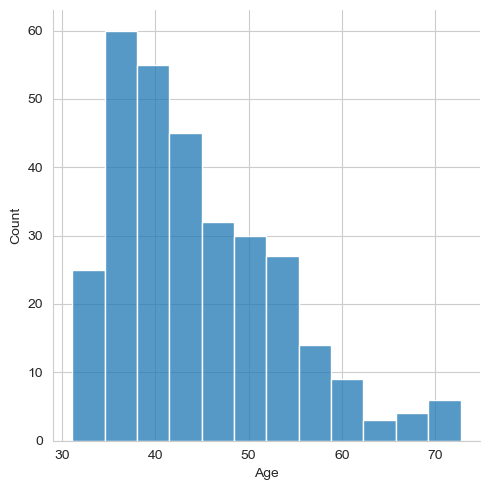

In [25]:
ax8 = sns.displot(diverse_data['Age'], kde=False)

In [26]:
diverse_data['AgeGroup']= pd.cut(diverse_data['Age'], [30,45,60,75], labels=['30-45','45-60','60-75'])

diverse_data['AgeGroup'].value_counts(normalize=True).sort_index(axis=0 , ascending= True)*100

AgeGroup
30-45    60.00000
45-60    34.83871
60-75     5.16129
Name: proportion, dtype: float64

* The staff's ages are mainly at late-30s, also counting high at early-40s. The number of employees is substantially lower for ages 60 and over about 5.2%.

* Considering how low the numbers go when it comes to older workers, it's important that we inquire how age diversity is promoted through recruiting.

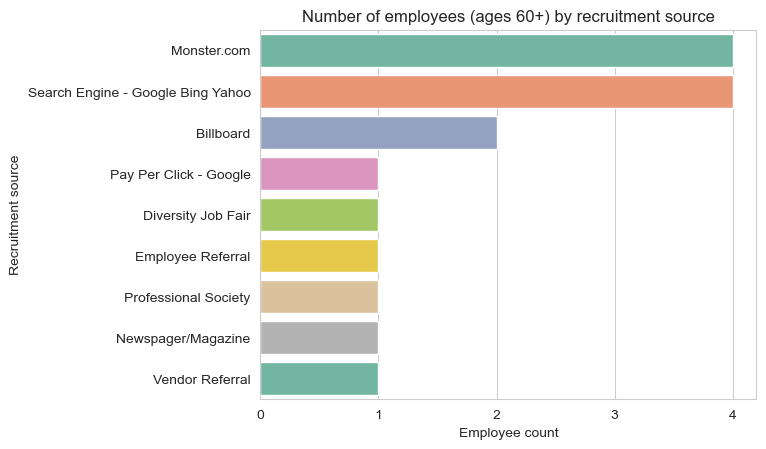

In [27]:
ordered_60 = diverse_data.loc[diverse_data['Age'] >= 60, 'RecruitmentSource'].value_counts()

ax9 = sns.barplot(x=ordered_60.values,y=ordered_60.index,palette='Set2')

ax9.set_ylabel('Recruitment source')

ax9.set_xlabel('Employee count')

ax9.set_xticks(range(5))

ax9.set_title('Number of employees (ages 60+) by recruitment source');


* Monster.com, and Search engine score the highest,hiring 4 mature employees, followed by Billboard, with 2. The numbers are really low, in such a way that no source is currently bringing a reasonable amount of older people to the company.

* Age diversity, which is not truly promoted by any recruitment source. The organization should review its hiring practices to remove any potential bias.

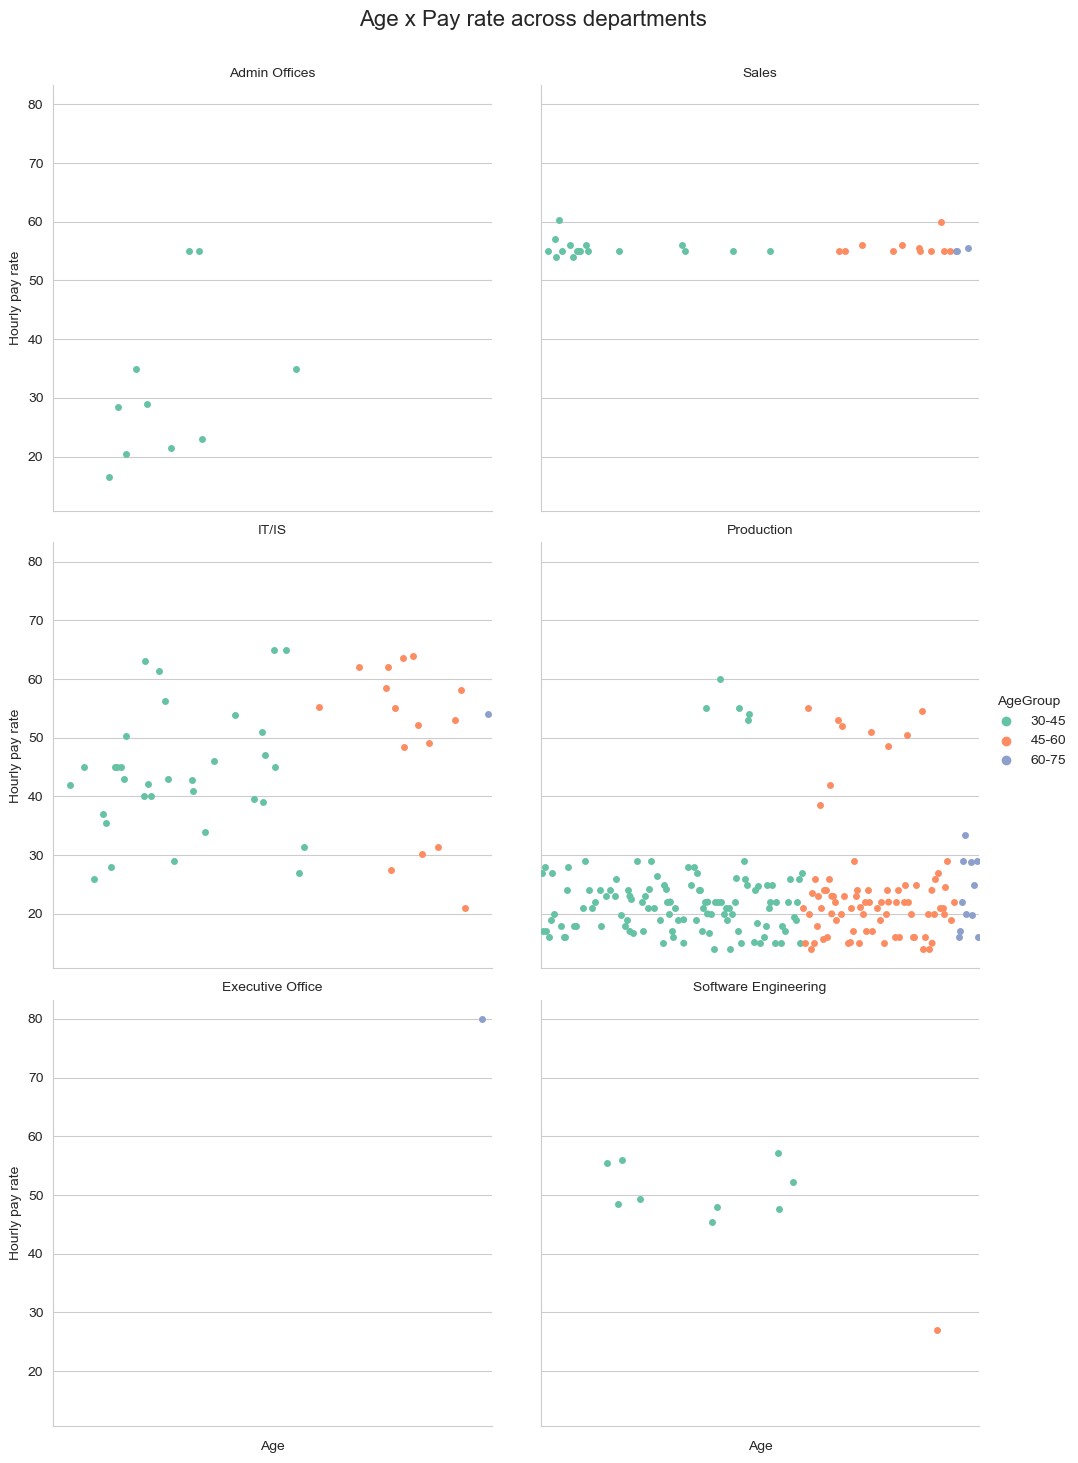

In [28]:
ax10 = sns.catplot(data=diverse_data, x='Age', y='PayRate', hue='AgeGroup', col='Department', col_wrap=2,palette='Set2')

ax10.set_xlabels('Age'), ax10.set_ylabels('Hourly pay rate')

ax10.set_xticklabels()

ax10.fig.suptitle('Age x Pay rate across departments', fontsize=16)

ax10.set_titles('{col_name}')

plt.subplots_adjust(top=0.93)

* We saw before that the employee count goes down for ages 60 and over. In the Production department, we can see that salaries are also diminished: these workers have a pay rate below 35, whereas some younger ones get as high as $60/hour. This calls for a more detailed analysis of this specific division.

* Although the plot is focused on salary, it also reveals that both Admin Offices and Software Engineering barely have any workers over 45.

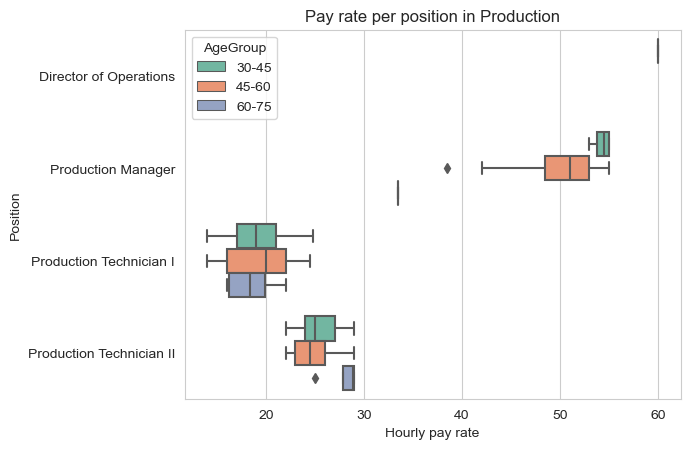

In [29]:
ax11 = sns.boxplot(x='PayRate', y='Position', hue='AgeGroup', data=diverse_data.loc[diverse_data['Department']=='Production'],palette='Set2') ;

ax11.set_xlabel('Hourly pay rate'); 

ax11.set_title('Pay rate per position in Production');

* The graph clarifies that it is generally not the case that older workers are getting a lower salary than their position's average. Matures' pay rates are limited because almost all of them work in lesser functions (Production Technician I and II).

# Result

**1. Which sources yield the best results for recruiting a diverse workforce?**

* An evaluation has shown that participating in the Diversity Job Fair is crucial for enhancing Dental Magic's diversity and should be further promoted. Most hires from Indeed and college recruitment initiatives belong to minority groups, whereas other sources predominantly attract Caucasian candidates, which warrants further investigation.

* The company falls short in achieving age diversity, with no recruitment source standing out in this regard.

**2. Does the company have any pay equity issues?**

* Within the IT/IS department, multiracial employees receive considerably less pay compared to their peers in the same roles, with no clear reason for this disparity.

* Overall, women earn less, especially in Production where they are the majority, and in Administrative roles where a significant gender pay gap exists. Moreover, employees over 60, particularly in Production, tend to hold lower-paying jobs.

**3. What does the diversity profile of the company look like?**

* Racially, whites are a majority, but job distribution among minorities is more equitable than national averages. Hispanics earn slightly more on average, while Native Americans or Alaska Natives earn less, although this is based on a small sample and cannot be definitively attributed to discrimination.

* Gender-wise, the company employs predominantly women, including its CEO, which is noteworthy in an employment landscape that typically favors men for leadership roles. The high number of women in Production is also significant. However, the company must address the gender pay gap that still exists.

* Age diversity is lacking, with only 5.2% of employees aged 60 or above, which is low compared to national figures. This is particularly concerning in the Software Engineering and Administrative departments with minimal representation of employees over 45, while the Sales department shows a better inclusion of older, well-compensated employees.